What if instead of trying faces etc etc we just 

found the center of the screen 

found the nearst number (contur)

found the nearst number to that number (conuturs again)

checked if they lined up if they did its a two diget number <br/>
---- lined up here means somthing need to be done by taking both conturs rotating each of them so that they have the thinist bounding box (that one of the dimensions is minimesed) if they both are rotated roughly the same amount to do this then they line up if it dosent work then it dosent

if they dont its a one digit number nad the one closest to the screen is the number

lazy but if it works thats a techincal working program

# step 0 take in the image
not going to be nessary in when this is moved over to main program

In [21]:
%matplotlib inline

import cv2 # The OpenCV library; install using `pip install opencv-contrib-python`
import numpy as np # Helpful when working with arrays; install using `pip install numpy`
from matplotlib import pyplot as plt # Good for graphing; install using `pip install matplotlib`
from matplotlib import image as image
import easygui # An easy-to-use file-picker; pip install easygui
import copy
debug = 1 #set to 1 to see each step set to 0 to run fast

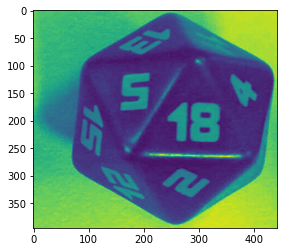

In [22]:
fileName = easygui.fileopenbox(filetypes=["*.jpg","*.jpeg","*.png"])
dieRaw = cv2.imread(fileName,cv2.IMREAD_COLOR)
dieRaw = cv2.cvtColor(dieRaw,cv2.COLOR_RGB2BGR)
dieGray = cv2.cvtColor(dieRaw,cv2.COLOR_BGR2GRAY)
if debug == 1:
    plt.imshow(dieGray)

# step 1 find the center of the screen

In [23]:
def displayCenterOfImage(image):#purely for debuing help
    h, w = image.shape
    midY, midX = h/2, w/2
    imageCopy = copy.deepcopy(image)
    imageCopy = cv2.cvtColor(imageCopy,cv2.COLOR_GRAY2BGR)
    cv2.circle(img = imageCopy,center = (int(midY), int(midX)),radius =5, color = (0,0,255), thickness = -1)
    plt.imshow(imageCopy)
    
def distBettweenPoints(x1,y1,x2,y2):
    distance = ((x1 - x2)**2 + (y1 - y2)**2)**0.5
    return distance

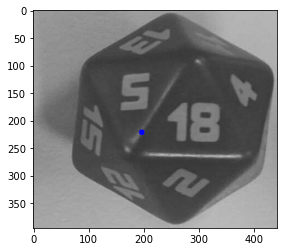

In [24]:
h, w = dieGray.shape
midY, midX = h/2, w/2
displayCenterOfImage(dieGray)
dieGrayEqual = cv2.equalizeHist(dieGray)


# step 2 find the two nearest conturs to the center

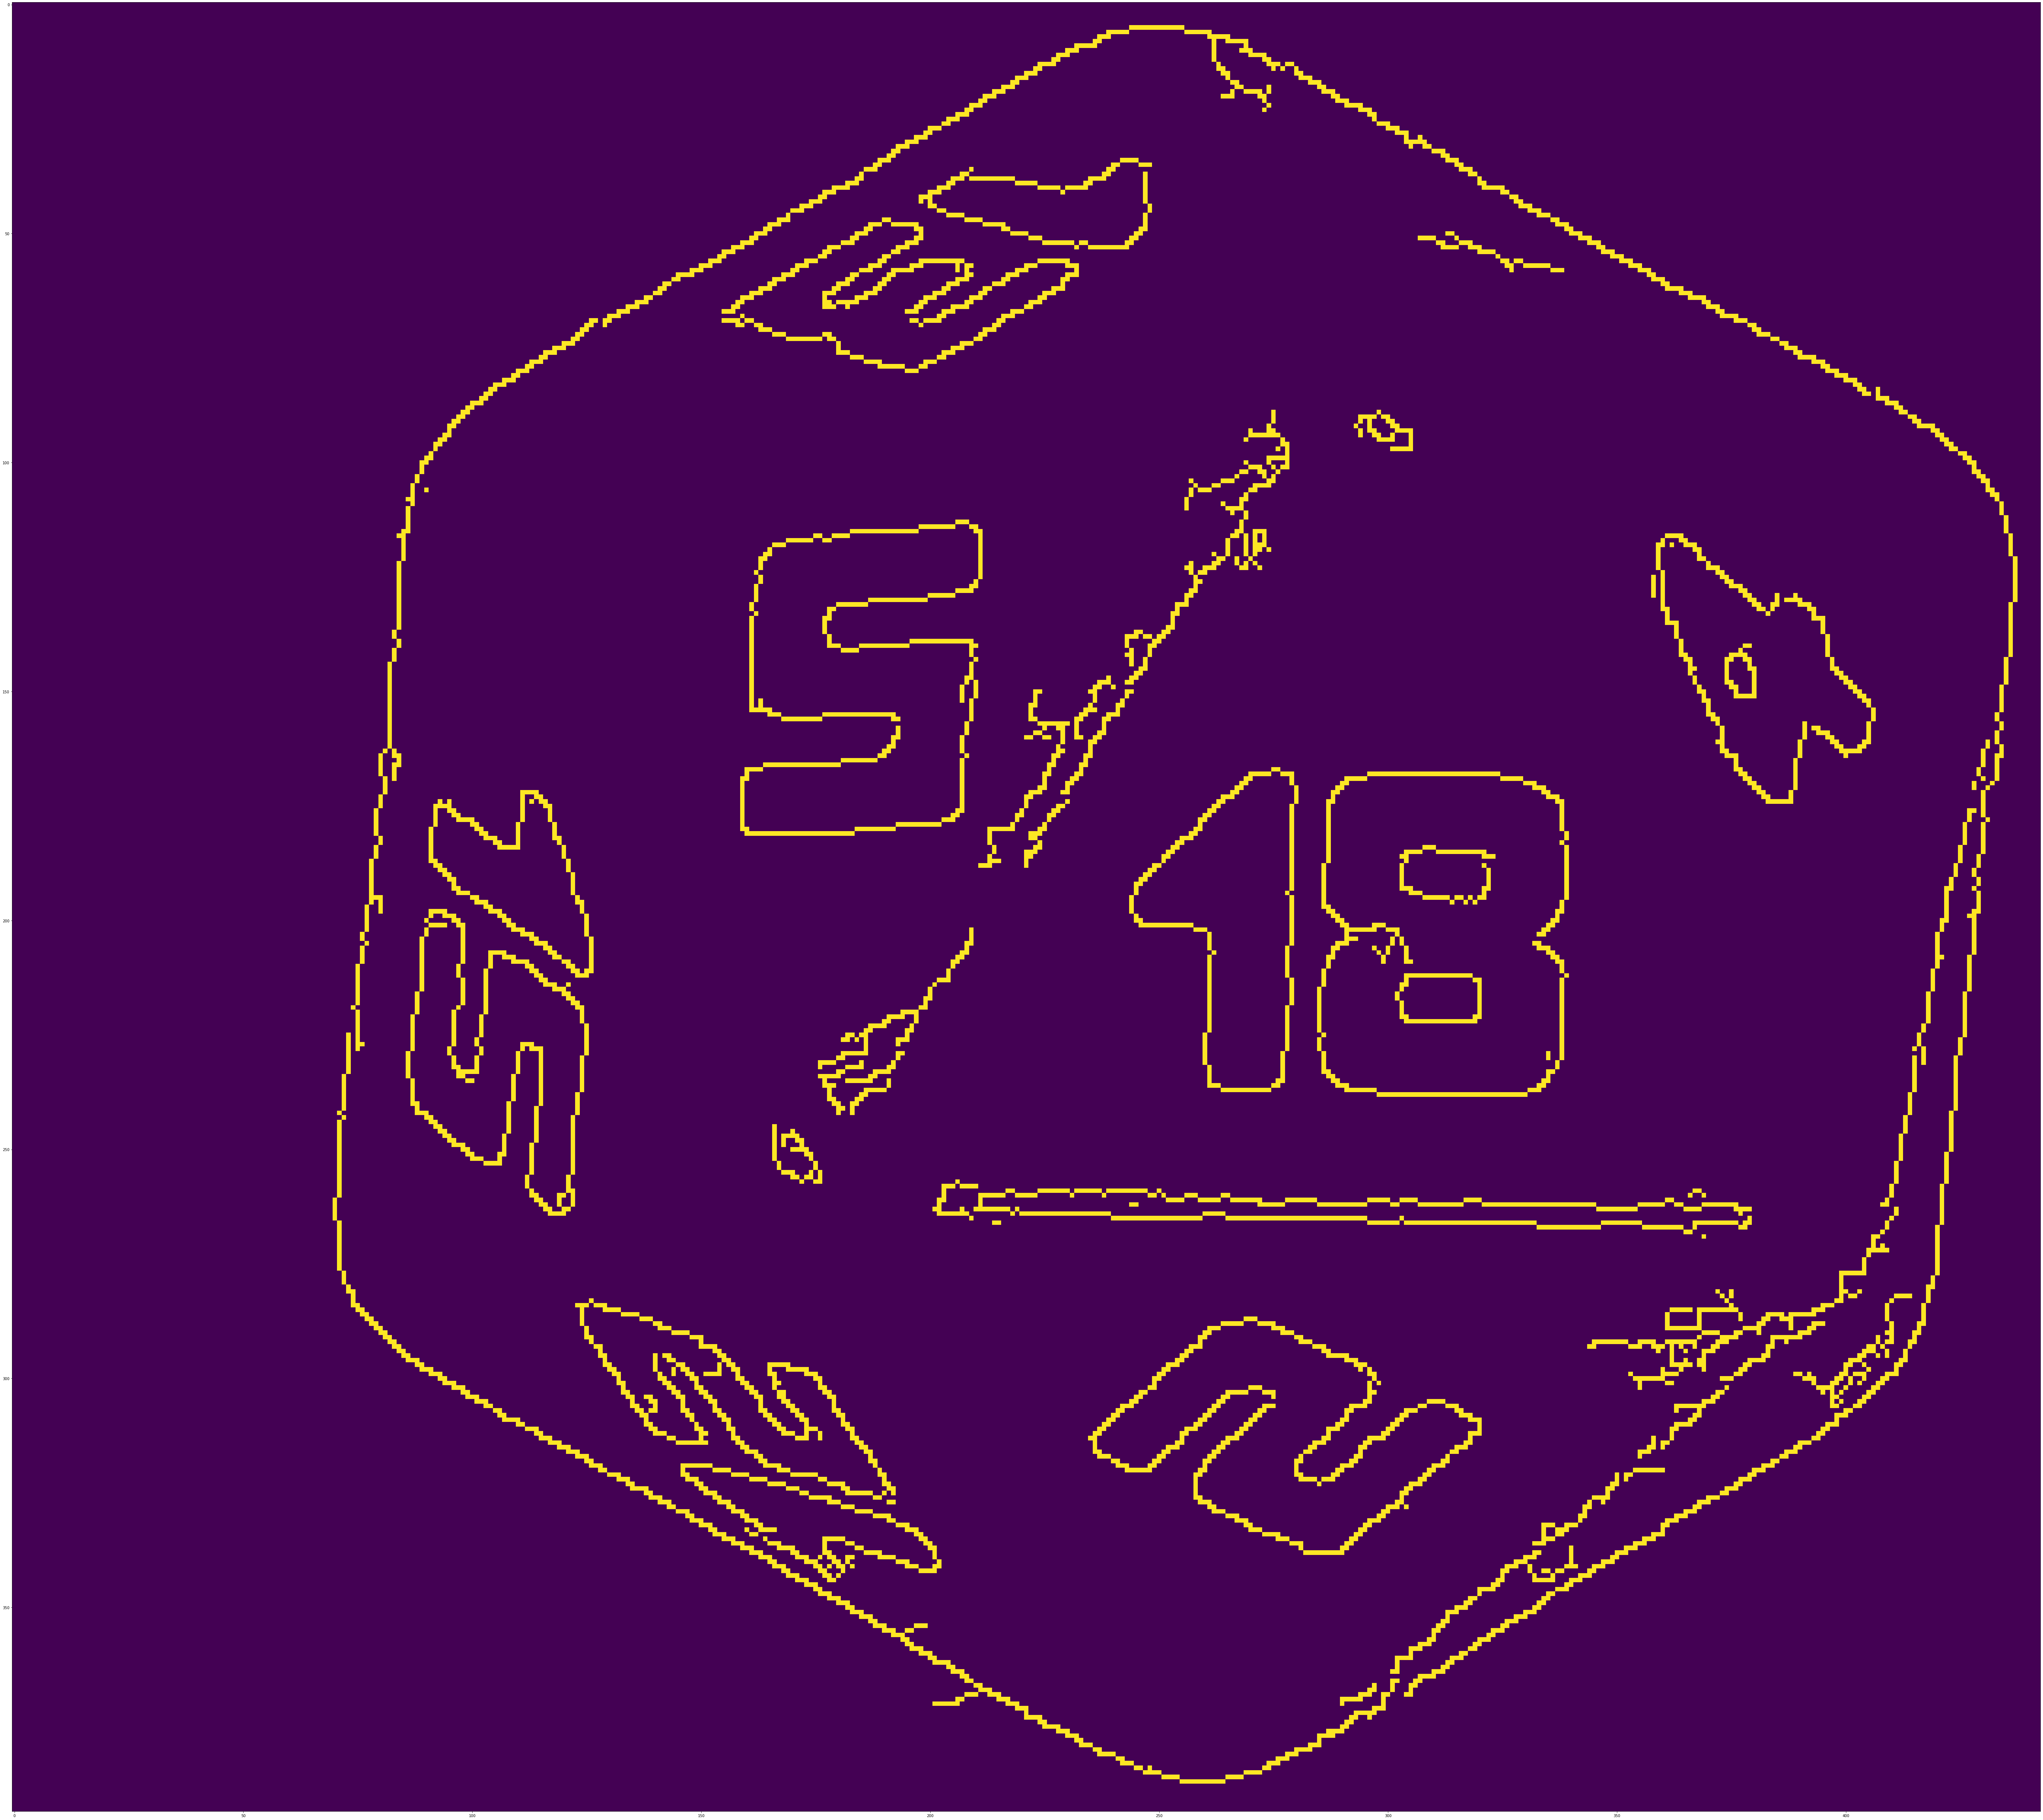

In [25]:
#MAGIC threshoulding stuff
#thresholdConsant = (np.mean(dieGray) + np.std(dieGray))/25
#threshholdedDieGray = cv2.adaptiveThreshold(dieGray, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 501,thresholdConsant)
#dieBlured = cv2.medianBlur(dieGray, 9)
cannyed = cv2.Canny(dieGray,0,100)
if debug == 1:
    plt.figure(figsize=(100,100))
    plt.imshow(cannyed)

 clean up

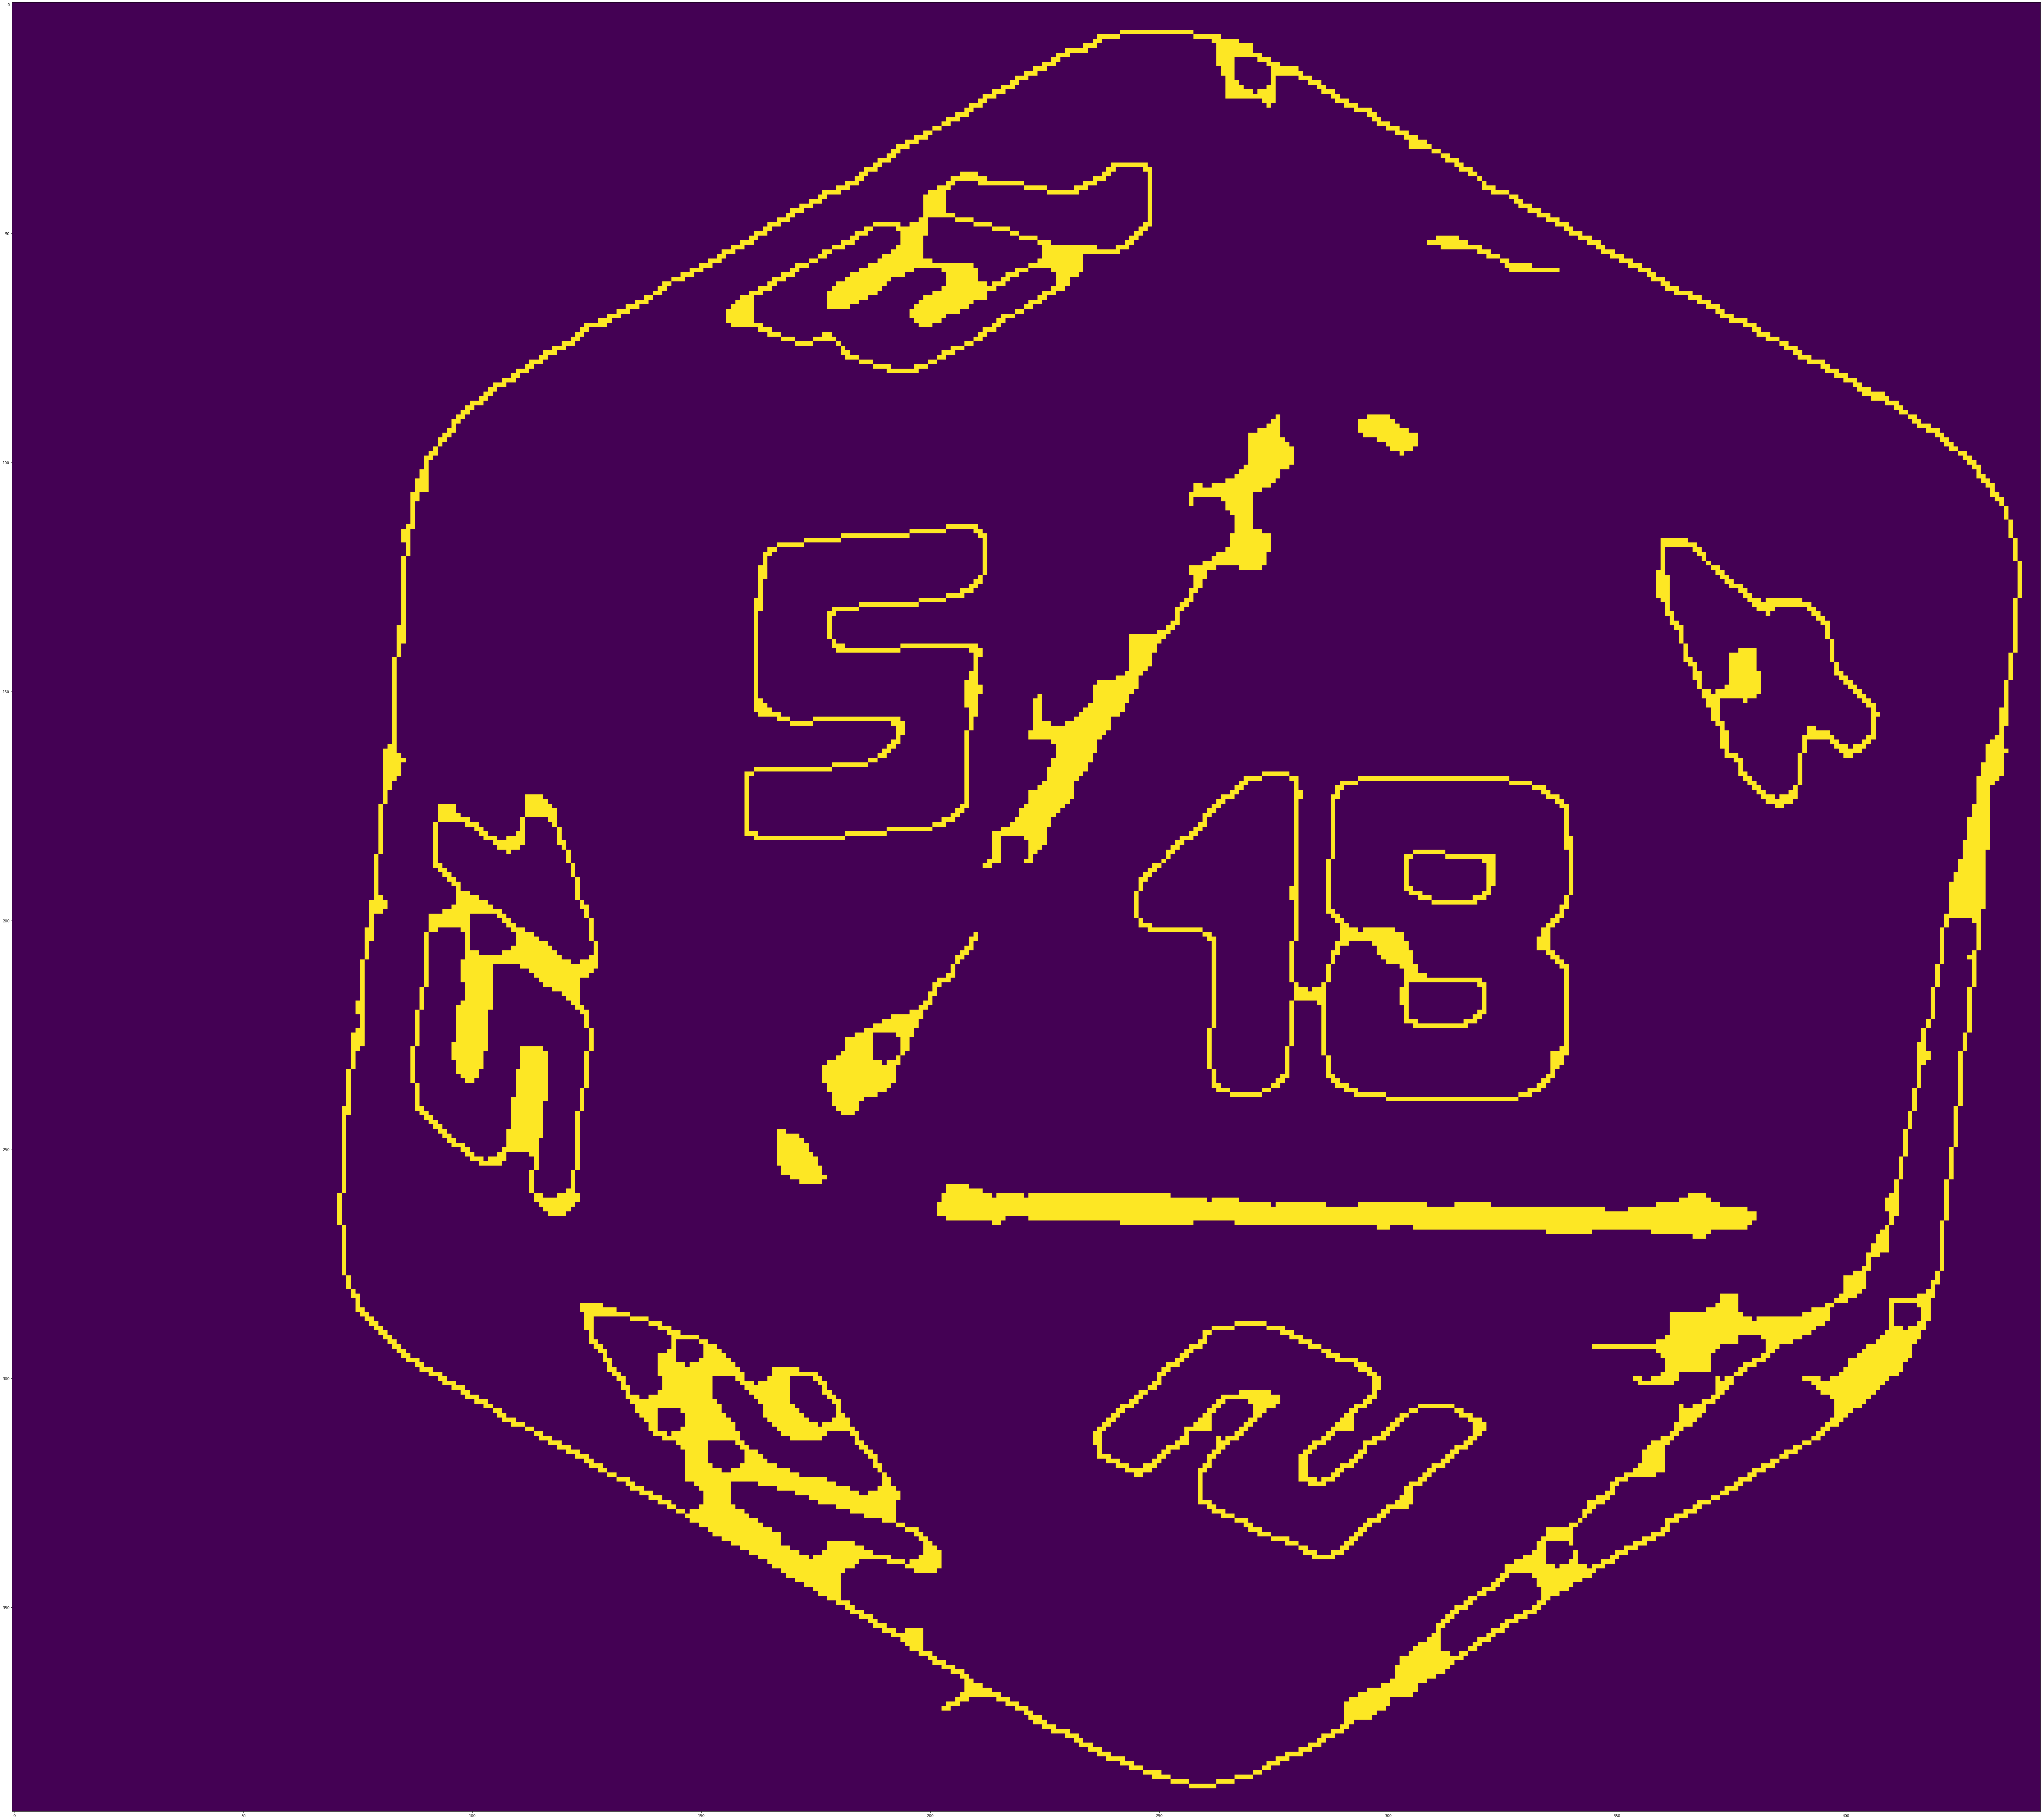

In [26]:
#MAGIC - how do we know what size the tiding up stuff should be?
def circle(diamter):
    return cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(diamter,diamter))
#making this genralised is really hard
circleSize = 6

diceMask = cv2.dilate(cannyed,circle(circleSize))
diceMask = cv2.erode(diceMask,circle(circleSize))

if debug == 1:
    plt.figure(figsize=(100,100))
    plt.imshow(diceMask)

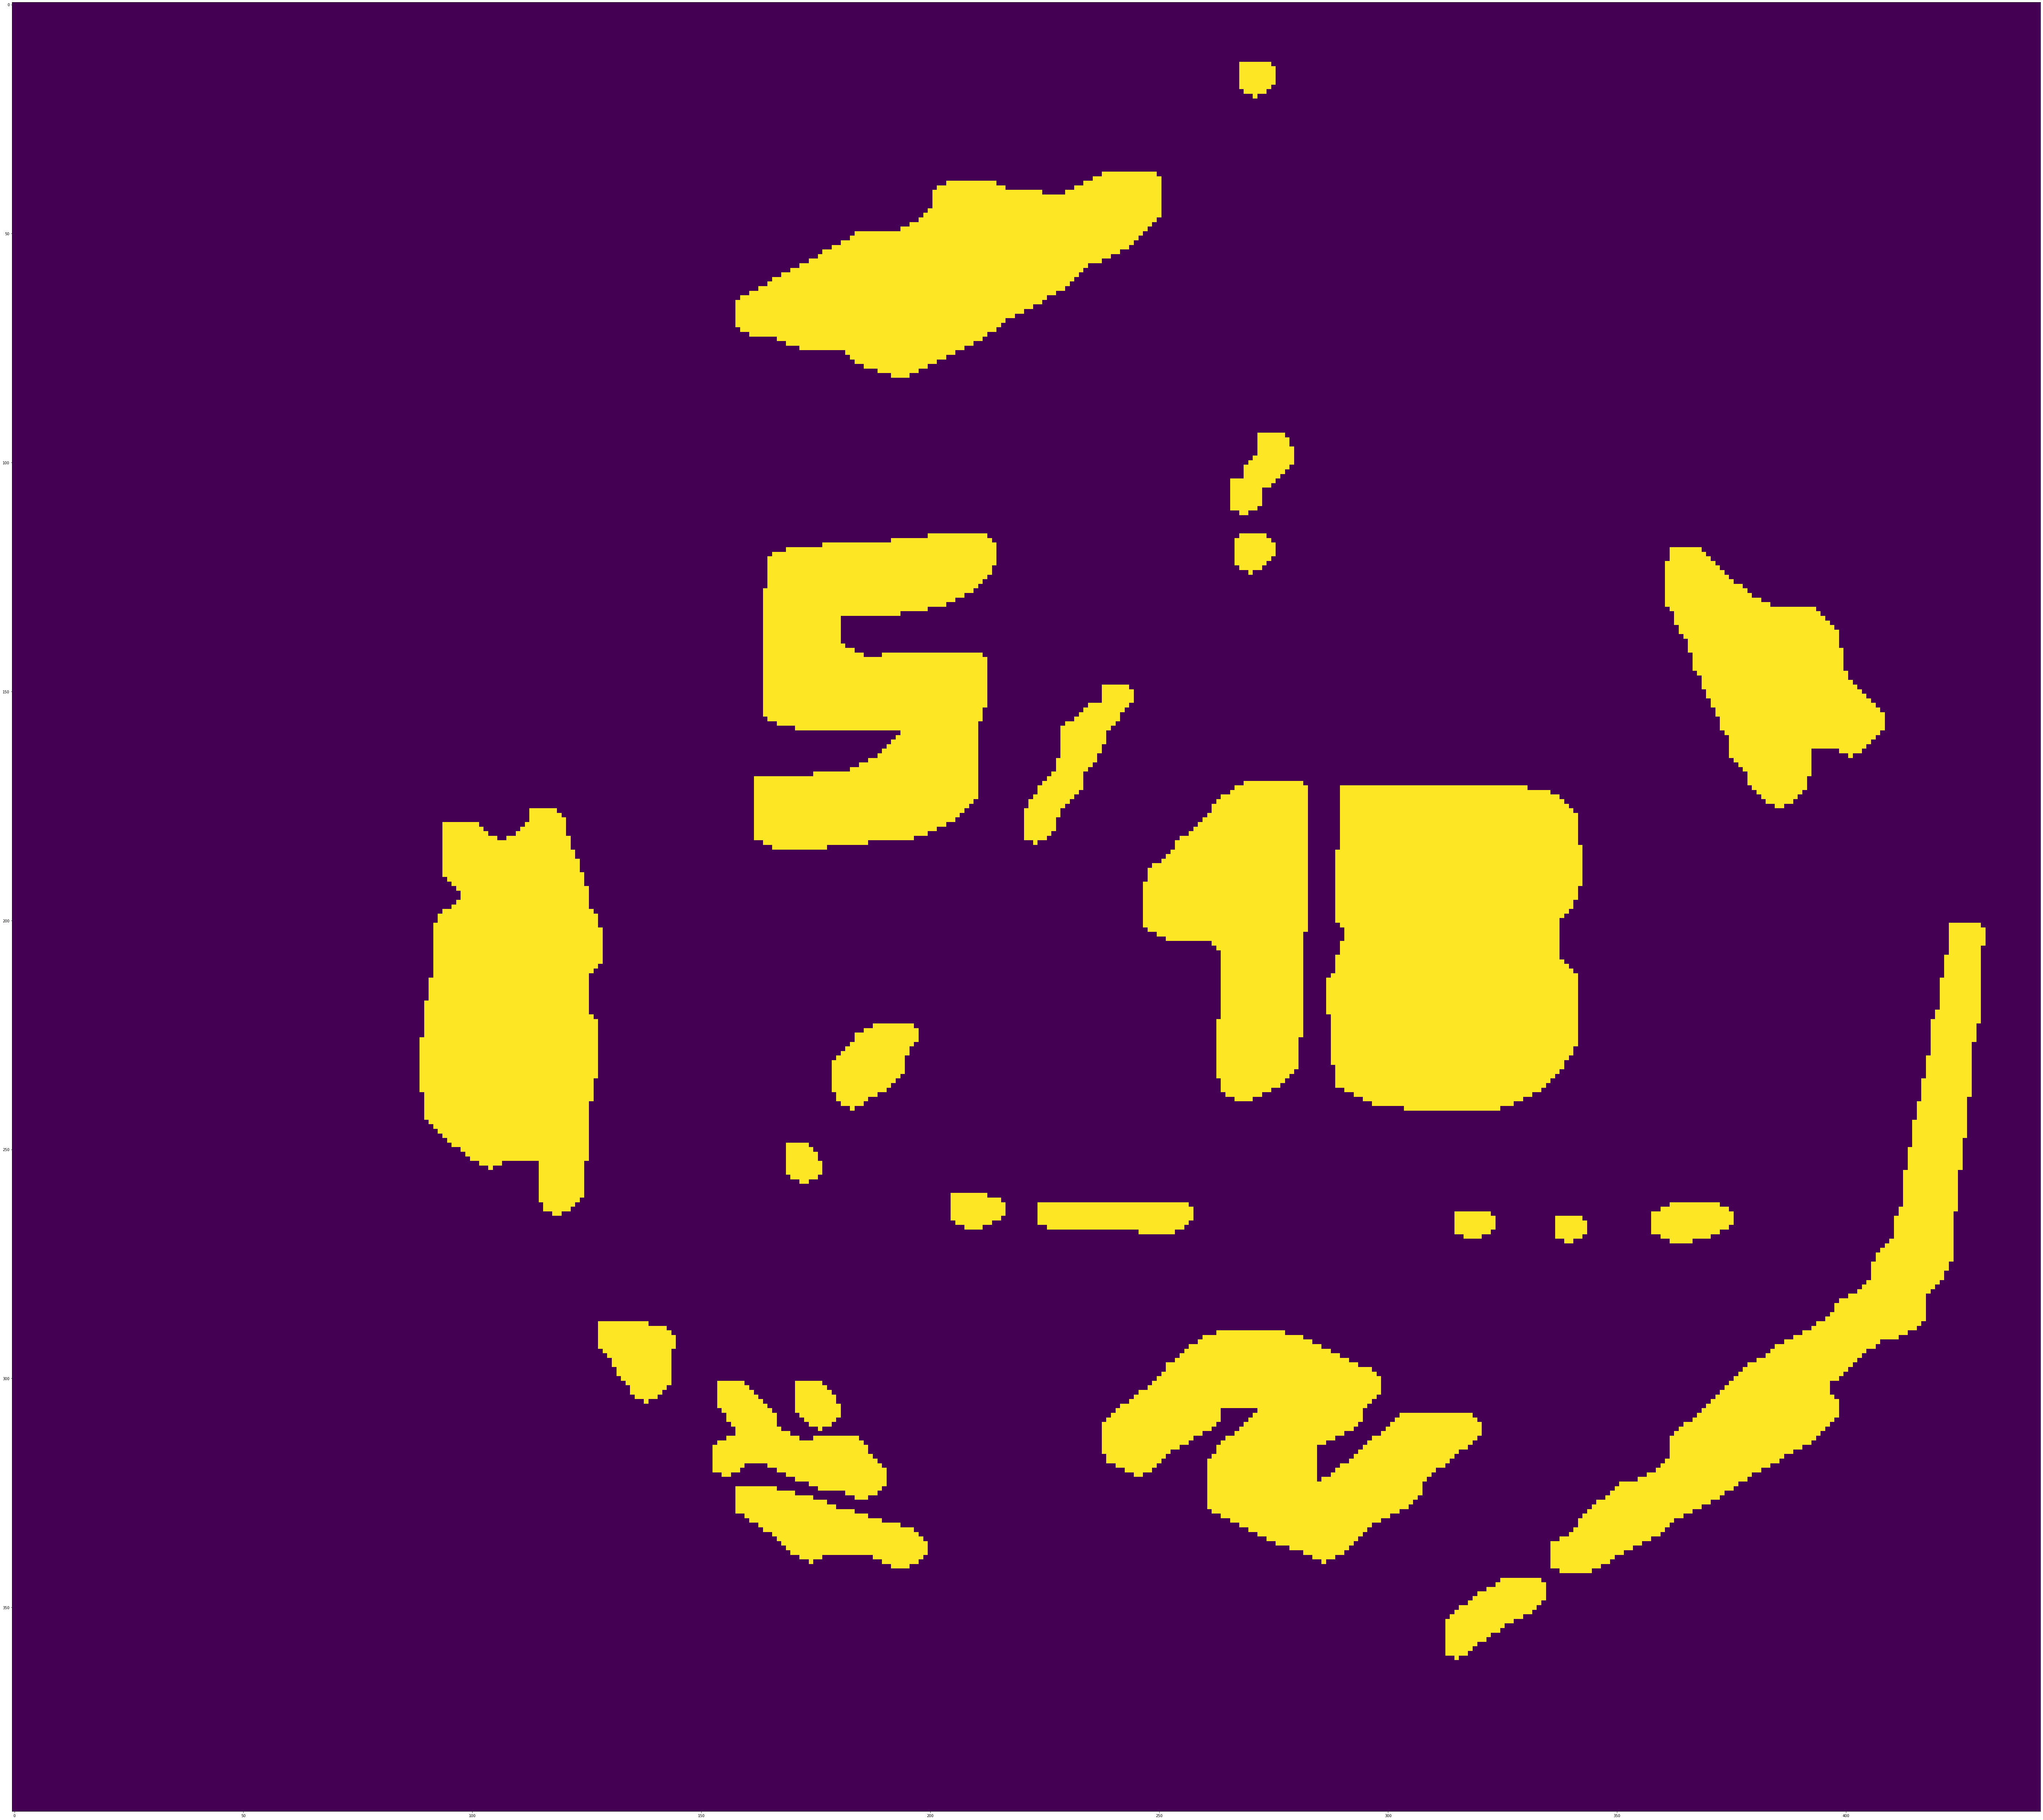

In [28]:
#if debug == 1:
#    plt.figure(figsize=(100,100))
#    plt.imshow(diceMask)
contours, hierarchy = cv2.findContours(diceMask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#if debug == 1:
    #print(contours)
    #print(hierarchy)
h, w = diceMask.shape
sizeOfImage = h*w
contoursWithoutDice = []
for contour in contours:
    #print(cv2.boundingRect(contour))
    #print("cv2.boundingRect(contour)[2]:",cv2.boundingRect(contour)[2],"cv2.boundingRect(contour)[3]",cv2.boundingRect(contour)[3],"*:",cv2.boundingRect(contour)[2]*cv2.boundingRect(contour)[3],"sizeOfImage/2:",sizeOfImage*0.9)
    
    if (cv2.boundingRect(contour)[2]*cv2.boundingRect(contour)[3] < sizeOfImage*0.5):
        contoursWithoutDice.append(contour)
        #print("added")
    #else:
    #    print("not added")
diceMask = np.zeros(shape=diceMask.shape, dtype=np.uint8)
cv2.fillPoly(diceMask,pts=contoursWithoutDice,color=(255))
#diceMask = cv2.erode(diceMask,circle(circleSize))
#diceMask = cv2.dilate(diceMask,circle(circleSize))

contoursWithoutDice, hierarchy = cv2.findContours(diceMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(diceMask,contoursWithoutDice,-1,255,thickness=cv2.FILLED)

circleSize = 6

diceMask = cv2.erode(diceMask,circle(circleSize))
diceMask = cv2.dilate(diceMask,circle(circleSize))

contoursWithoutDice, hierarchy = cv2.findContours(diceMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if debug == 1:
    plt.figure(figsize=(100,100))
    plt.imshow(diceMask)    

https://theailearner.com/tag/angle-of-rotation-by-cv2-minarearect/

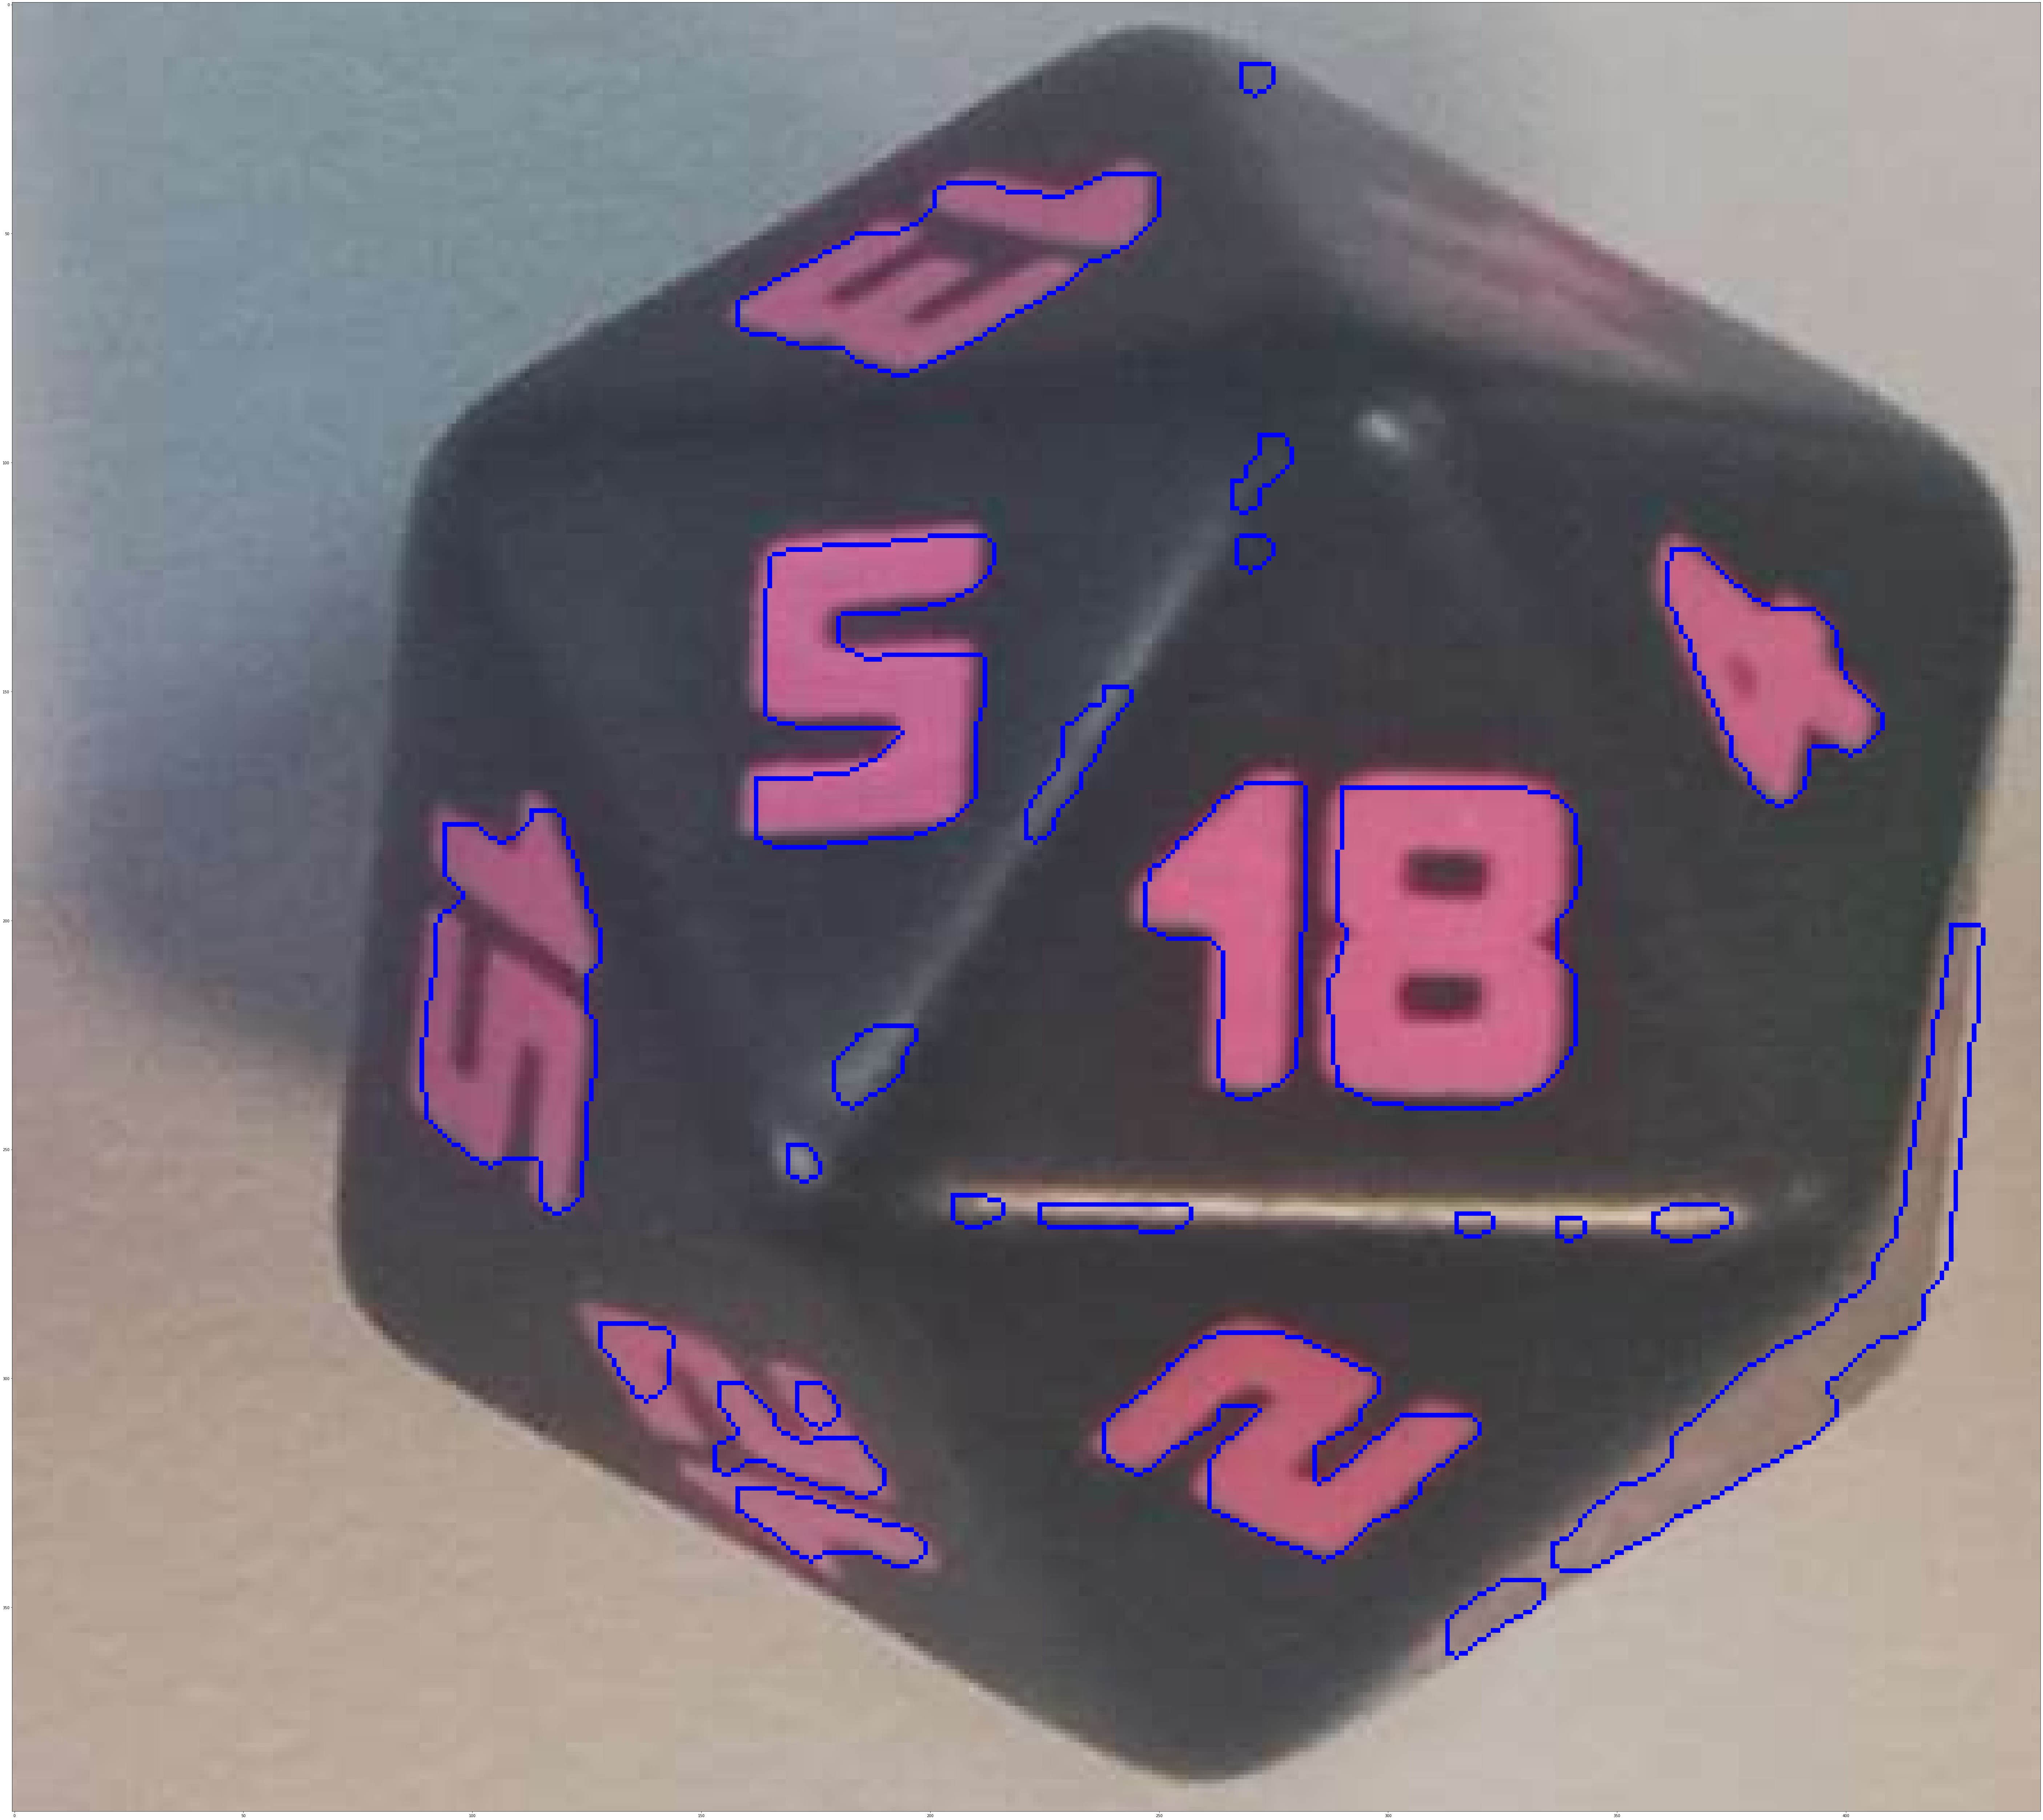

In [29]:
if debug == 1:
    dieRawTemp = copy.deepcopy(dieRaw)
    cv2.drawContours(dieRawTemp,contoursWithoutDice,-1,(0,0,255),1)
    plt.figure(figsize=(100,100))
    plt.imshow(dieRawTemp)

In [30]:
h, w = diceMask.shape
midY, midX = h/2, w/2
closestContur = 0
distance = h+w #always way bigger than anyother possible distance
for contur in contoursWithoutDice:
    for cords in contur:
        print("cords:")
        print(cords)
        x,y = cords[0]
        if distBettweenPoints(x,y,midX,midY) < distance:
            closestContur = contur
            distance = distBettweenPoints(x,y,midX,midY)
            if debug == 1:
                print("distance is now:")
                print(distance)

cords:
[[325 344]]
distance is now:
179.37251740442292
cords:
[[323 346]]
cords:
[[322 346]]
distance is now:
179.31118202722328
cords:
[[321 347]]
cords:
[[320 347]]
distance is now:
179.03212002319583
cords:
[[317 350]]
cords:
[[316 350]]
cords:
[[313 353]]
cords:
[[313 360]]
cords:
[[314 360]]
cords:
[[315 361]]
cords:
[[316 360]]
cords:
[[317 360]]
cords:
[[320 357]]
cords:
[[321 357]]
cords:
[[323 355]]
cords:
[[324 355]]
cords:
[[326 353]]
cords:
[[327 353]]
cords:
[[328 352]]
cords:
[[329 352]]
cords:
[[330 351]]
cords:
[[331 351]]
cords:
[[334 348]]
cords:
[[334 345]]
cords:
[[333 344]]
cords:
[[158 324]]
distance is now:
141.54327960026927
cords:
[[158 329]]
cords:
[[159 329]]
cords:
[[161 331]]
cords:
[[162 331]]
cords:
[[164 333]]
cords:
[[165 333]]
cords:
[[170 338]]
cords:
[[171 338]]
cords:
[[172 339]]
cords:
[[173 339]]
cords:
[[174 340]]
cords:
[[175 339]]
cords:
[[176 339]]
cords:
[[177 338]]
cords:
[[187 338]]
cords:
[[188 339]]
cords:
[[189 339]]
cords:
[[190 340]]
c

cords:
[[109 182]]
cords:
[[108 182]]
cords:
[[107 183]]
cords:
[[106 183]]
cords:
[[105 182]]
cords:
[[104 182]]
cords:
[[101 179]]
cords:
[[ 94 179]]
cords:
[[ 94 190]]
cords:
[[ 98 194]]
cords:
[[ 98 195]]
cords:
[[ 95 198]]
cords:
[[ 94 198]]
cords:
[[ 93 199]]
cords:
[[ 93 200]]
cords:
[[ 92 201]]
cords:
[[ 92 212]]
cords:
[[ 91 213]]
cords:
[[ 91 217]]
cords:
[[ 90 218]]
cords:
[[ 90 225]]
cords:
[[ 89 226]]
cords:
[[ 89 237]]
cords:
[[ 90 238]]
cords:
[[ 90 243]]
cords:
[[ 96 249]]
cords:
[[ 97 249]]
cords:
[[100 252]]
cords:
[[101 252]]
cords:
[[102 253]]
cords:
[[103 253]]
cords:
[[104 254]]
cords:
[[105 253]]
cords:
[[106 253]]
cords:
[[107 252]]
cords:
[[114 252]]
cords:
[[115 253]]
cords:
[[115 261]]
cords:
[[116 262]]
cords:
[[116 263]]
cords:
[[117 263]]
cords:
[[118 264]]
cords:
[[119 264]]
cords:
[[120 263]]
cords:
[[121 263]]
cords:
[[124 260]]
cords:
[[124 253]]
cords:
[[125 252]]
cords:
[[125 240]]
cords:
[[126 239]]
cords:
[[126 235]]
cords:
[[127 234]]
cords:
[[127

cords:
[[250  46]]
cords:
[[250  38]]
cords:
[[249  37]]
cords:
[[268  13]]
cords:
[[268  18]]
cords:
[[269  19]]
cords:
[[270  19]]
cords:
[[271  20]]
cords:
[[272  19]]
cords:
[[273  19]]
cords:
[[275  17]]
cords:
[[275  14]]
cords:
[[274  13]]


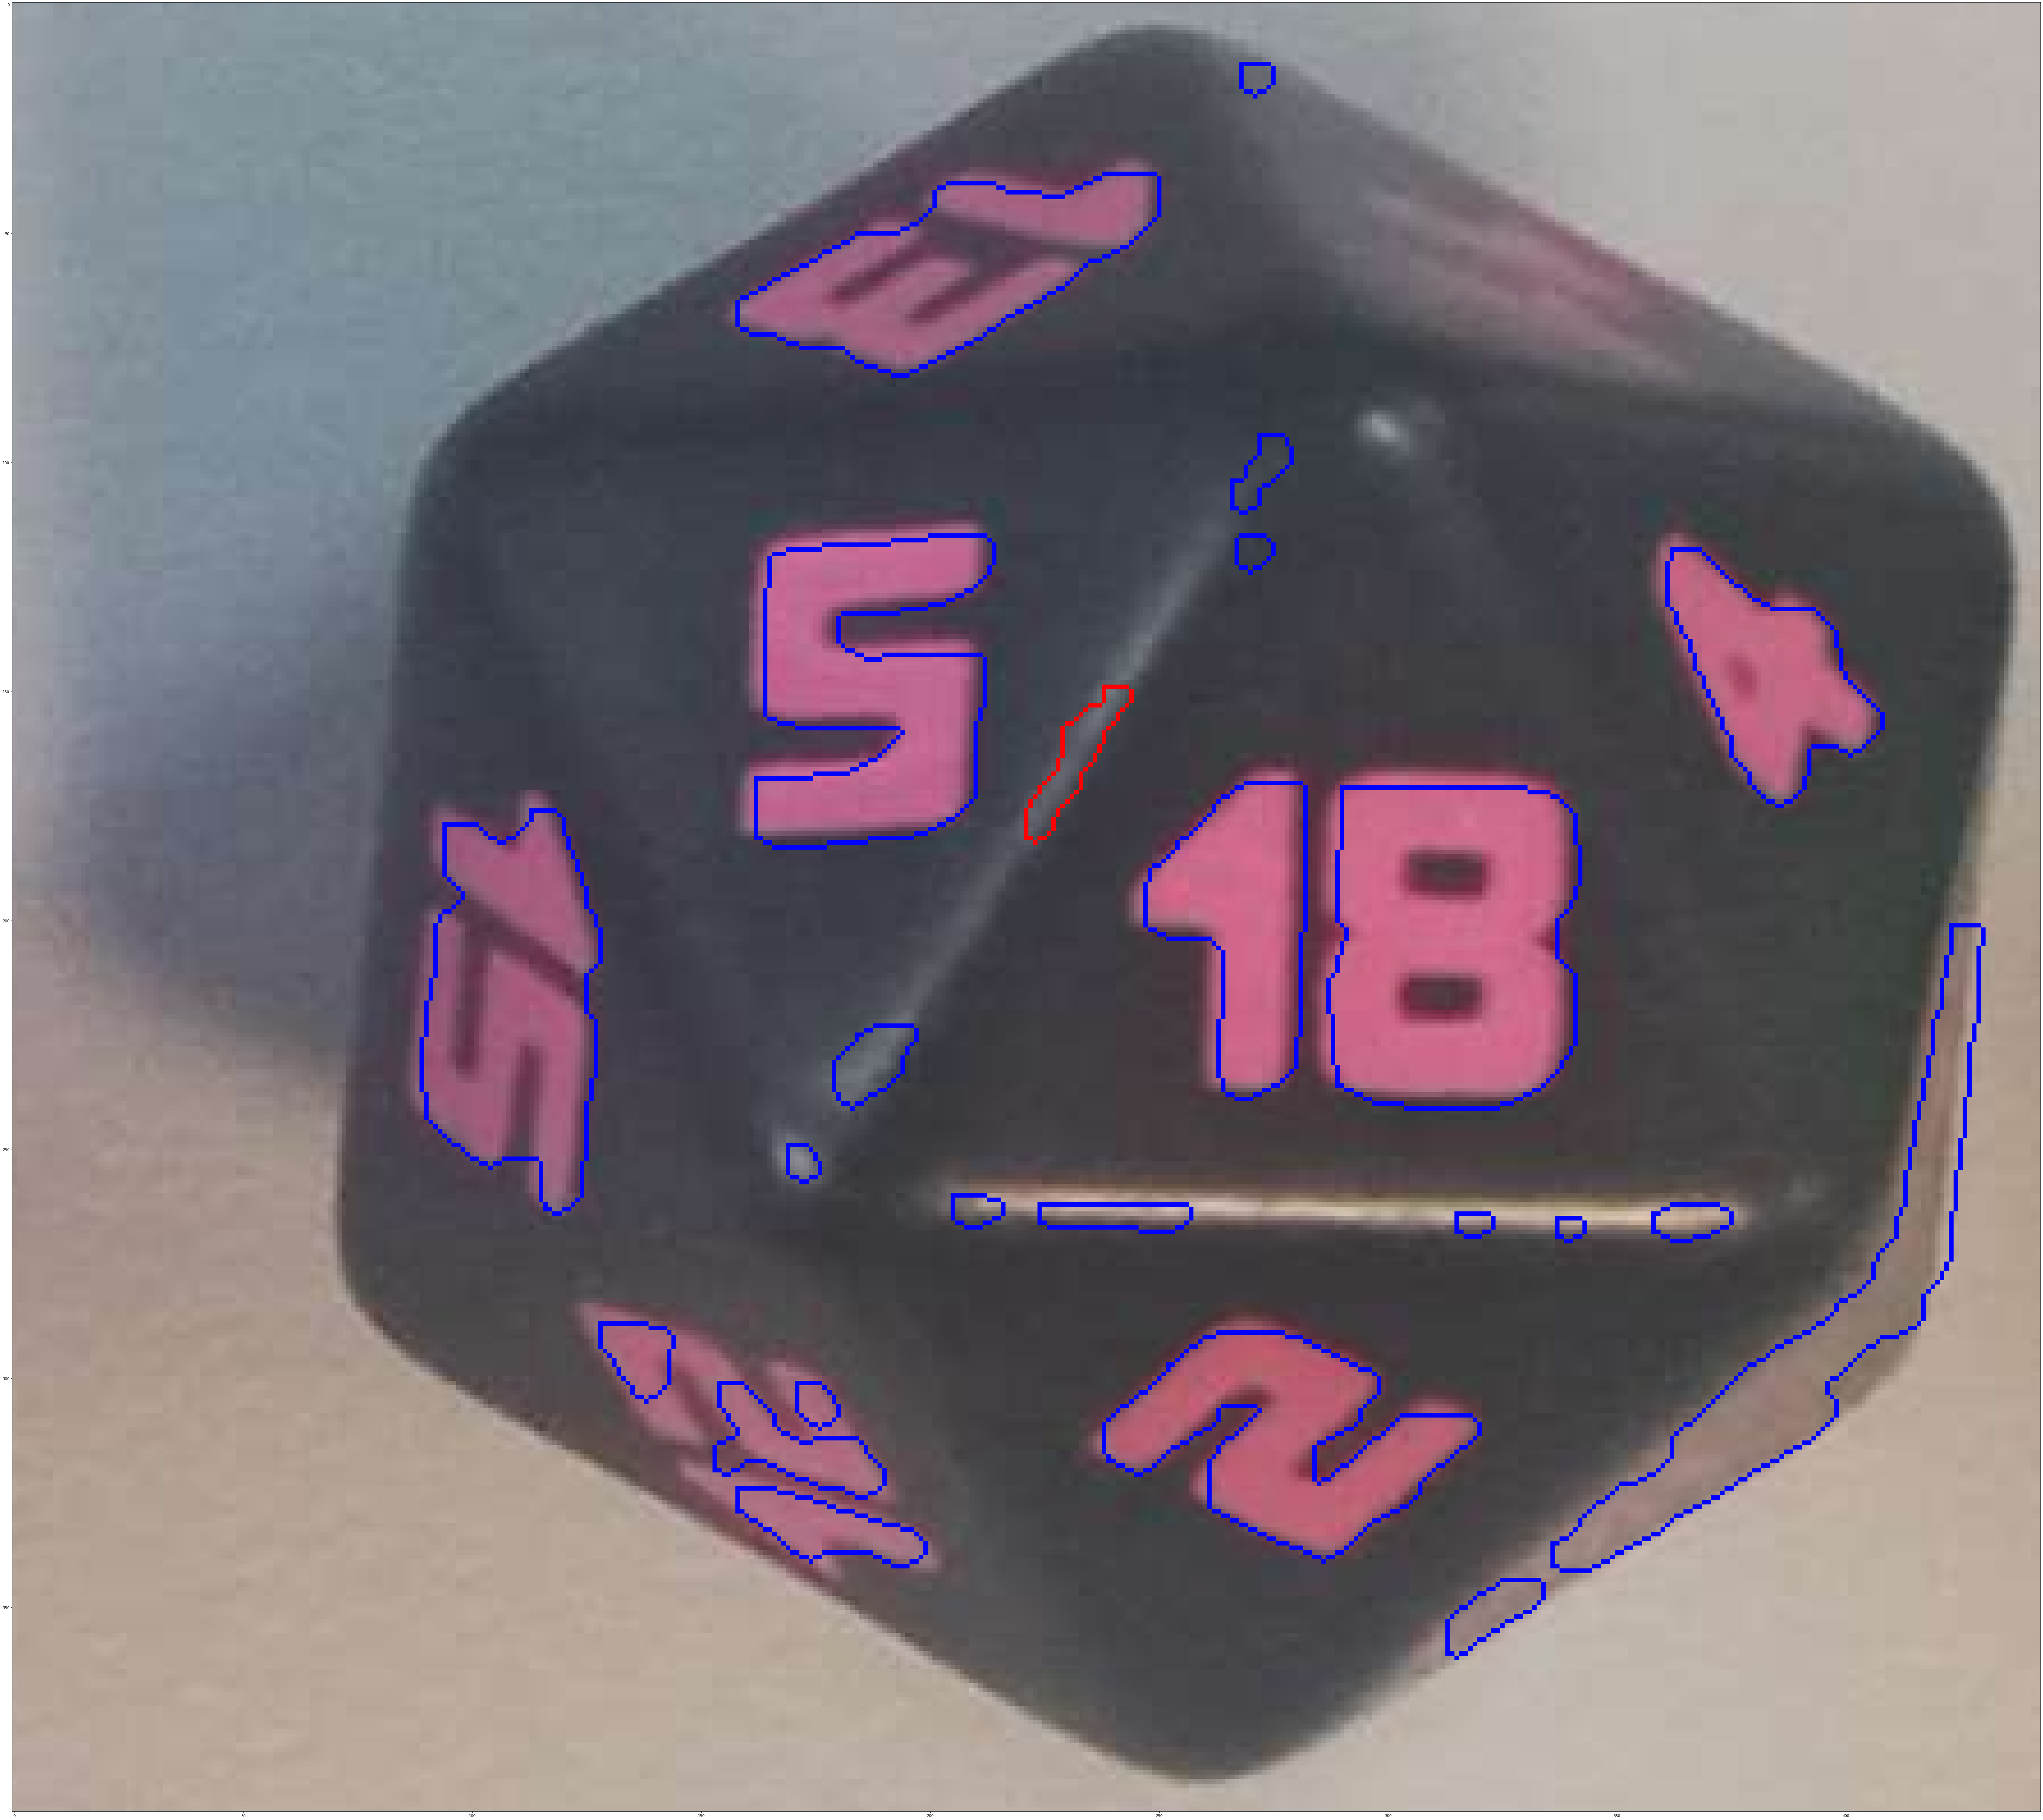

In [31]:
if debug == 1:
    cv2.drawContours(dieRawTemp,[closestContur],-1,(255,0,0),1)
    plt.figure(figsize=(100,100))
    plt.imshow(dieRawTemp)

whats a moment?

In [11]:
centerMoment = cv2.moments(closestContur)
if debug == 1:
    print(centerMoment)
centerMomentMassCenter = centerMoment['m10'] / (centerMoment['m00'] + 1e-5), centerMoment['m01'] / (centerMoment['m00'] + 1e-5)
if debug == 1:
    print(centerMomentMassCenter)


#sourced from:
# Get the moments
mu = [None]*len(contoursWithoutDice)
for i in range(len(contoursWithoutDice)):
    mu[i] = cv2.moments(contoursWithoutDice[i])

    # Get the mass centers
mc = [None]*len(contoursWithoutDice)
for i in range(len(contoursWithoutDice)):
    # add 1e-5 to avoid division by zero
    mc[i] = (mu[i]['m10'] / (mu[i]['m00'] + 1e-5), mu[i]['m01'] / (mu[i]['m00'] + 1e-5))
if debug == 1:
    print(mc)

{'m00': 249.0, 'm10': 49003.166666666664, 'm01': 50308.666666666664, 'm20': 9647297.666666666, 'm11': 9900870.583333332, 'm02': 10172757.833333332, 'm30': 1899953362.8500001, 'm21': 1949222275.3166666, 'm12': 2002056414.7833333, 'm03': 2058661858.2, 'mu20': 3481.0266622062773, 'mu11': 131.71809460036457, 'mu02': 8252.043061133474, 'mu30': -3657.6399974823, 'mu21': 3031.324980497244, 'mu12': 5809.603001852287, 'mu03': -5537.32309961319, 'nu20': 0.05614468576645984, 'nu11': 0.0021244511314392435, 'nu02': 0.1330953220292168, 'nu30': -0.0037385448074915293, 'nu21': 0.003098376076775766, 'nu12': 0.005938107946958269, 'nu03': -0.0056598053760653}
(196.79985822758266, 202.04282990457173)
[(188.04494369656976, 421.80945685564177), (300.6880942911534, 354.2763436065102), (309.17585951027394, 326.25225457588544), (42.35724582745179, 278.4394369112613), (368.486885865365, 258.45592621539186), (179.84284863629213, 245.58376975519332), (121.7629278922458, 227.48271714683014), (196.79985822758266, 2

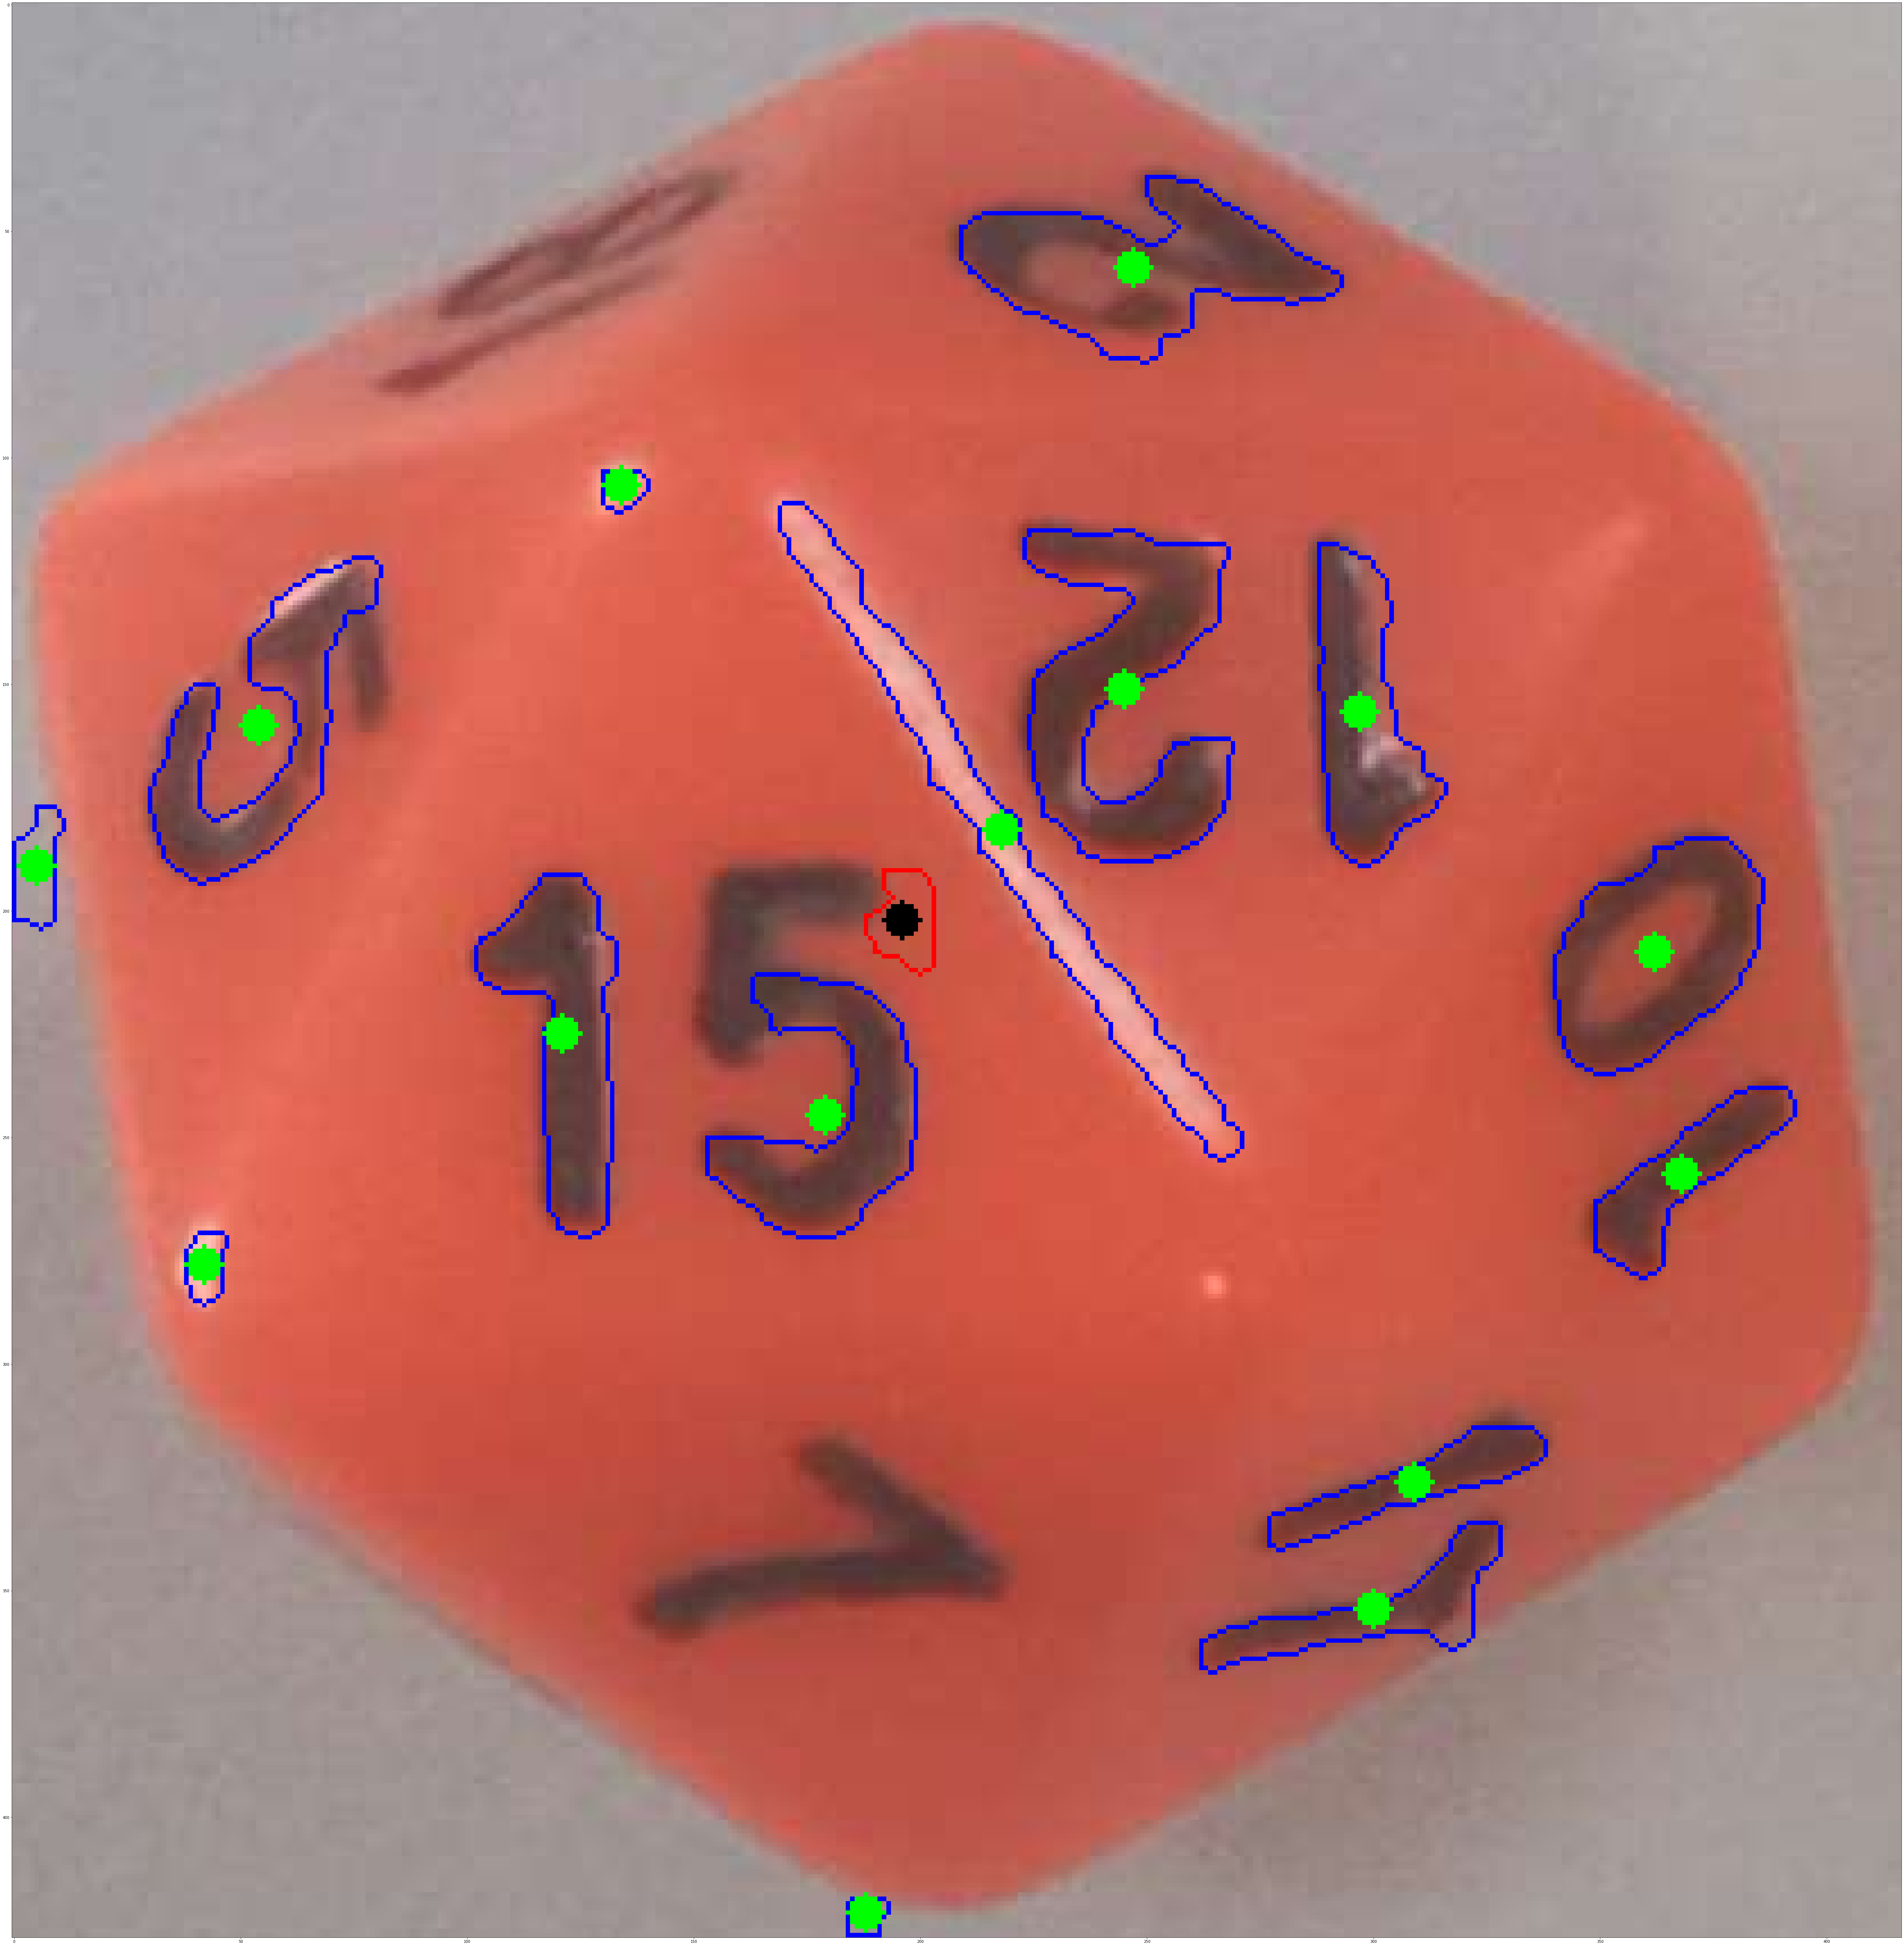

In [12]:
if debug == 1:
    for i in range(len(contoursWithoutDice)):
        cv2.circle(dieRawTemp, (int(mc[i][0]), int(mc[i][1])), 4, (0,255,0), -1)
    cv2.circle(dieRawTemp,(int(centerMomentMassCenter[0]),int(centerMomentMassCenter[1])),4,(0,0,0),-1)
    plt.figure(figsize=(100,100))
    plt.imshow(dieRawTemp)

illustrated above is a problem spefilcy the 9 with two dots inside of it
the following code works around this but really this problem should be fixed using hirarcys
https://docs.opencv.org/4.x/d9/d8b/tutorial_py_contours_hierarchy.html
\<refactor using this might make faster code

In [13]:
distance = h+w #always way bigger than anyother possible distance

xCord1 = centerMomentMassCenter[0]
yCord1 = centerMomentMassCenter[1]
secondClosestCord = ()
secondClosestCordIndex = 0
i = 0
for cords in mc:
    xCord2 = cords[0]
    yCord2 = cords[1]
    if distBettweenPoints(xCord1,yCord1,xCord2,yCord2) < distance and cords != centerMomentMassCenter and cv2.pointPolygonTest(contour=closestContur,pt=cords,measureDist=False)==-1:
        secondClosestCord = cords
        secondClosestCordIndex = i
        distance = distBettweenPoints(xCord1,yCord1,xCord2,yCord2)
    i += 1
    
print(secondClosestCord)
print(secondClosestCordIndex)
print(distance)

(218.45641592285185, 182.97297168850142)
13
28.85595230779167


time to use this https://theailearner.com/tag/angle-of-rotation-by-cv2-minarearect/

vx: [0.55806935] vy: [0.82979435] x: [224.45] y: [191.3]
vx: [0.04712036] vy: [0.9988892] x: [196.8] y: [202.4]


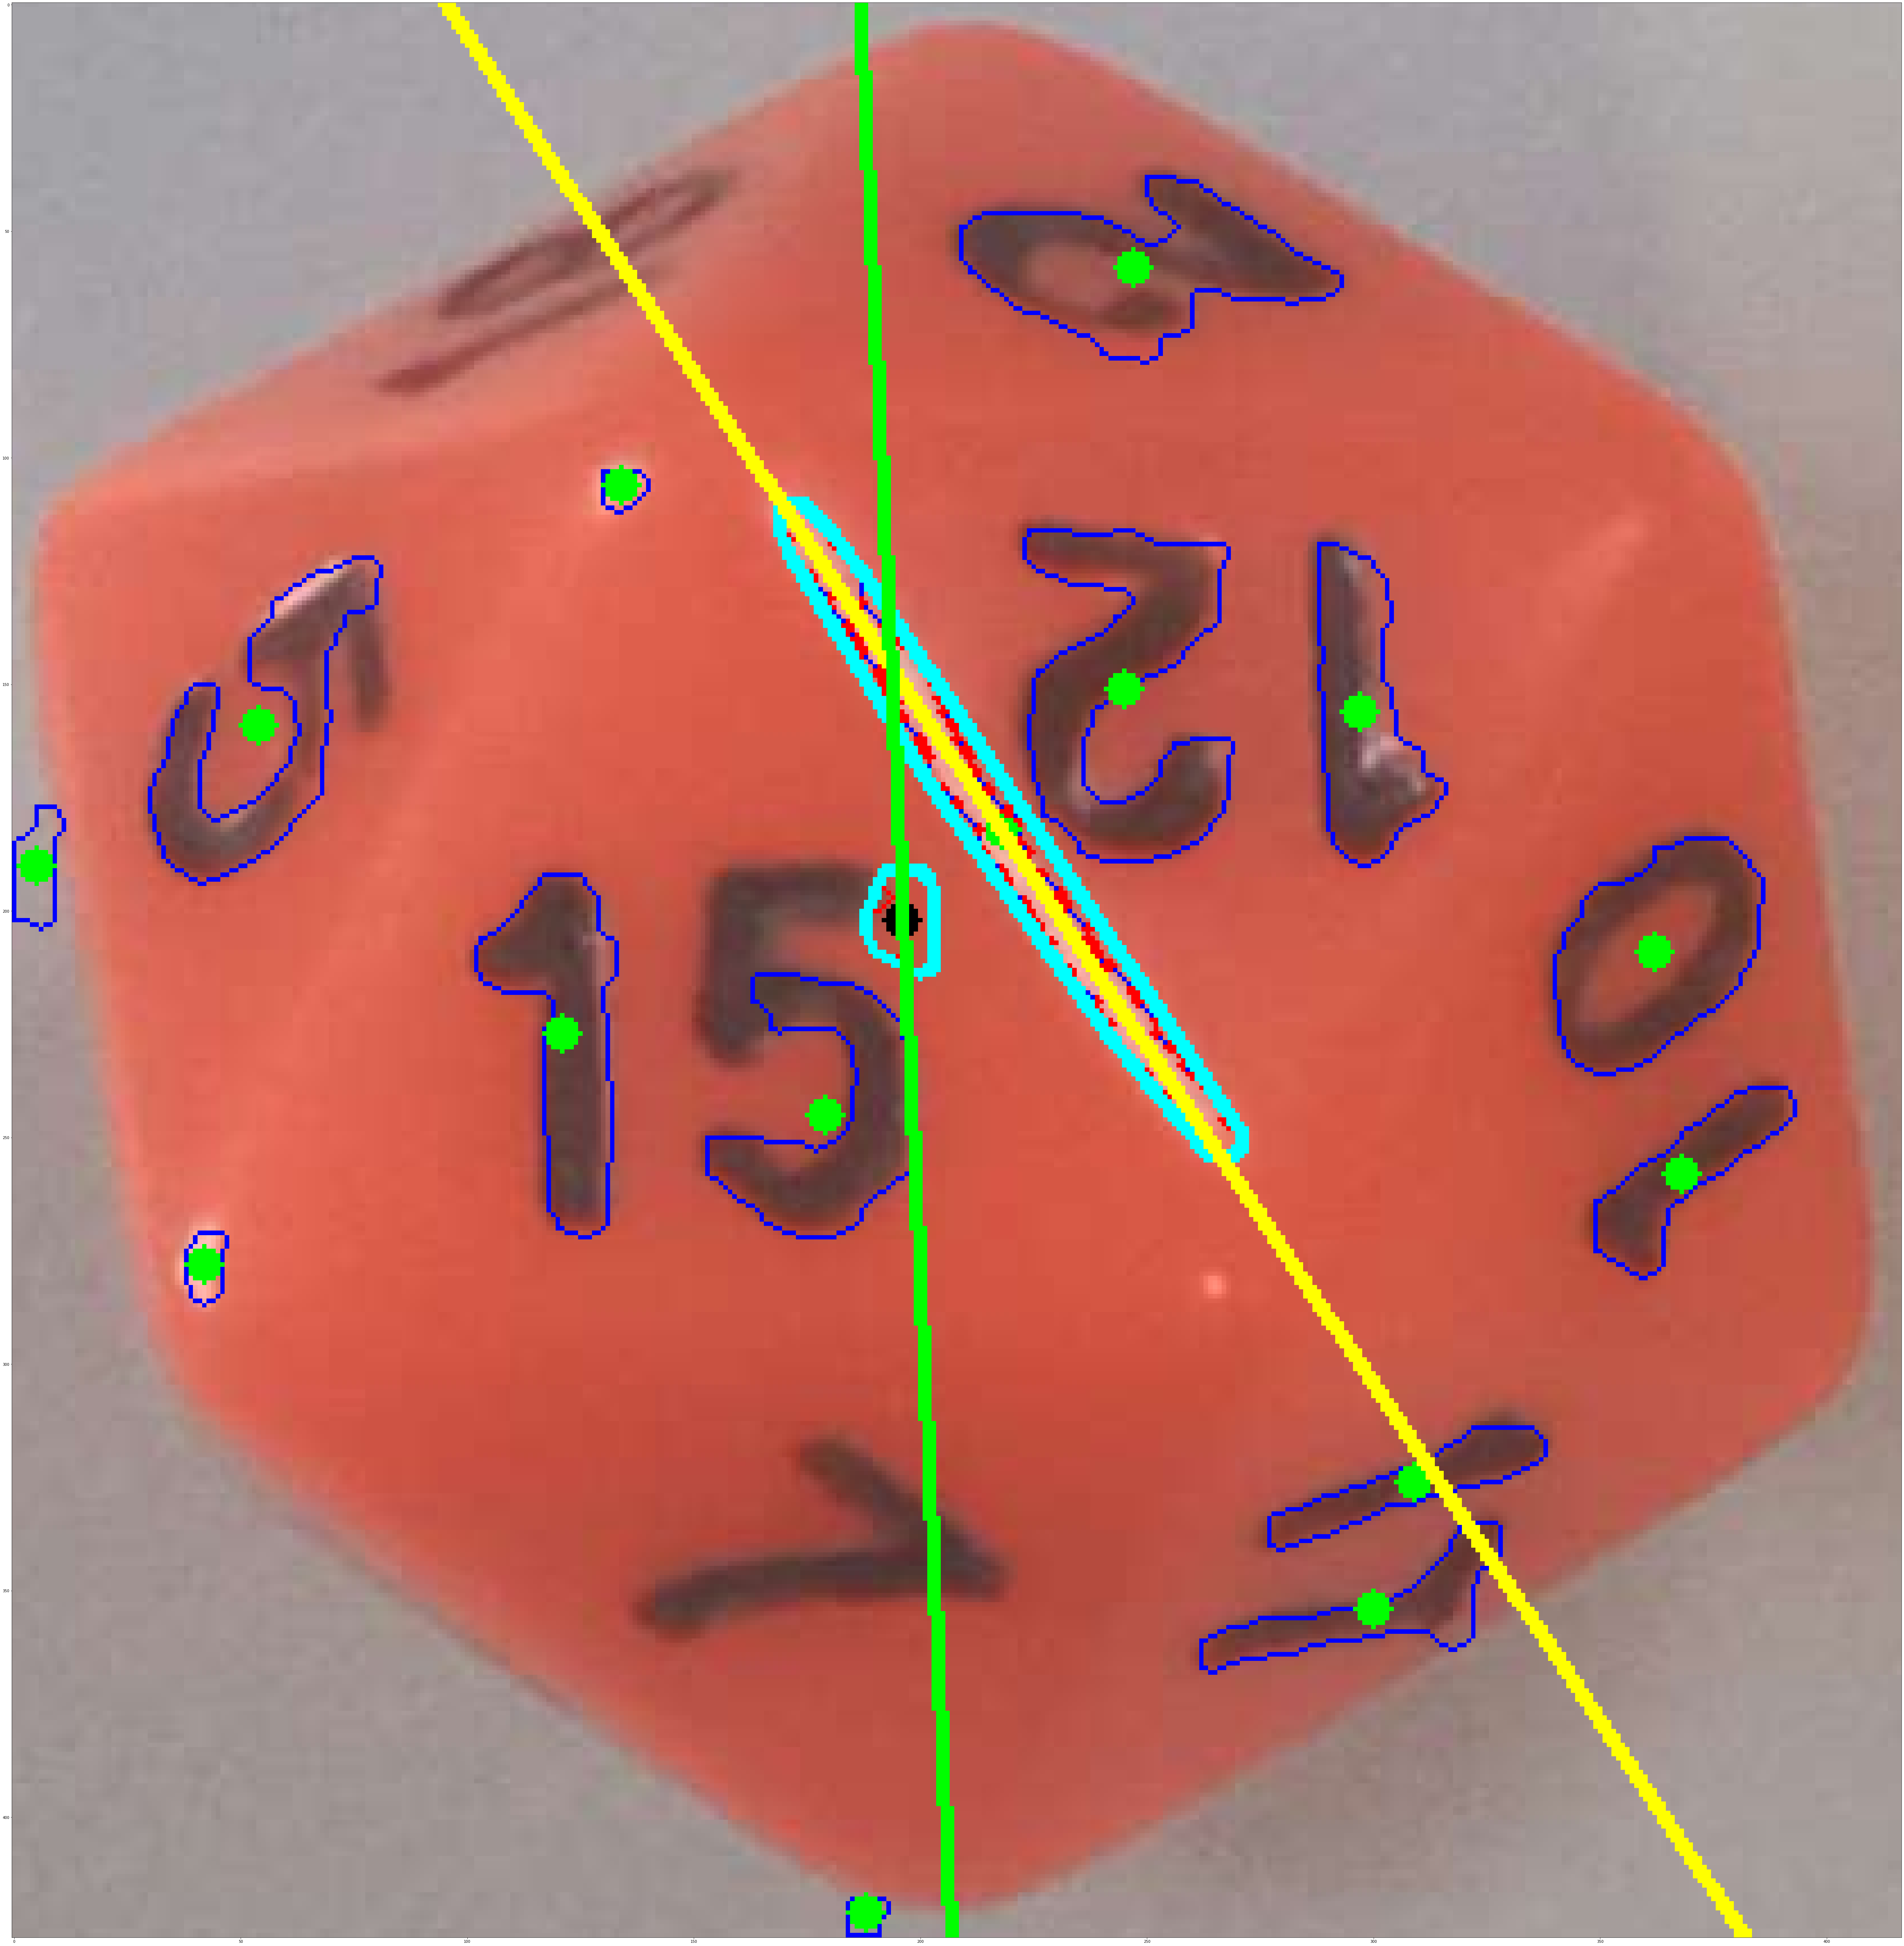

In [14]:
hullOfClosestCenter = cv2.convexHull(closestContur)
hullOfSecondClosest = cv2.convexHull(contoursWithoutDice[secondClosestCordIndex])

if debug == 1:
    cv2.drawContours(dieRawTemp,contoursWithoutDice[secondClosestCordIndex],-1,(255,0,0),2)
    cv2.drawContours(dieRawTemp,[hullOfClosestCenter],-1,(0,255,255),2)
    cv2.drawContours(dieRawTemp,[hullOfSecondClosest],-1,(0,255,255),2)

rows,cols = dieRawTemp.shape[:2]
        
[vx,vy,x,y] = cv2.fitLine(hullOfSecondClosest, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)

if debug == 1:
    cv2.line(dieRawTemp,(cols-1,righty),(0,lefty),(255,255,0),2)
    print("vx:",vx,"vy:",vy,"x:",x,"y:",y)
        
[vx,vy,x,y] = cv2.fitLine(hullOfClosestCenter, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)

if debug == 1:
    cv2.line(dieRawTemp,(cols-1,righty),(0,lefty),(0,255,0),2)
    print("vx:",vx,"vy:",vy,"x:",x,"y:",y)
    plt.figure(figsize=(100,100))
    plt.imshow(dieRawTemp)

In [15]:
def crop_minAreaRect(img, rect):

    # rotate img
    angle = rect[2]
    rows,cols = img.shape[0], img.shape[1]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    img_rot = cv2.warpAffine(img,M,(cols,rows))

    # rotate bounding box
    rect0 = (rect[0], rect[1], 0.0) 
    box = cv2.boxPoints(rect0)
    pts = np.int0(cv2.transform(np.array([box]), M))[0]    
    pts[pts < 0] = 0

    # crop
    img_crop = img_rot[pts[1][1]:pts[0][1], 
                       pts[1][0]:pts[2][0]]

    return img_crop

#from: https://stackoverflow.com/a/48553593
def getSubImage(rect, src):
    # Get center, size, and angle from rect
    center, size, theta = rect
    # Convert to int 
    center, size = tuple(map(int, center)), tuple(map(int, size))
    if debug == 1:
        print(center)
        print(size)
    size = (size[0]+14,size[1]+14)
    # Get rotation matrix for rectangle
    M = cv2.getRotationMatrix2D( center, theta, 1)
    # Perform rotation on src image
    dst = cv2.warpAffine(src, M, src.shape[:2])
    out = cv2.getRectSubPix(dst, size, center)
    return out

((195.5, 202.5), (23.0, 15.0), 90.0)
((217.94654846191406, 183.05184936523438), (174.74398803710938, 14.016434669494629), 55.89872360229492)
34.10127639770508
(195, 202)
(23, 15)
(217, 183)
(174, 14)


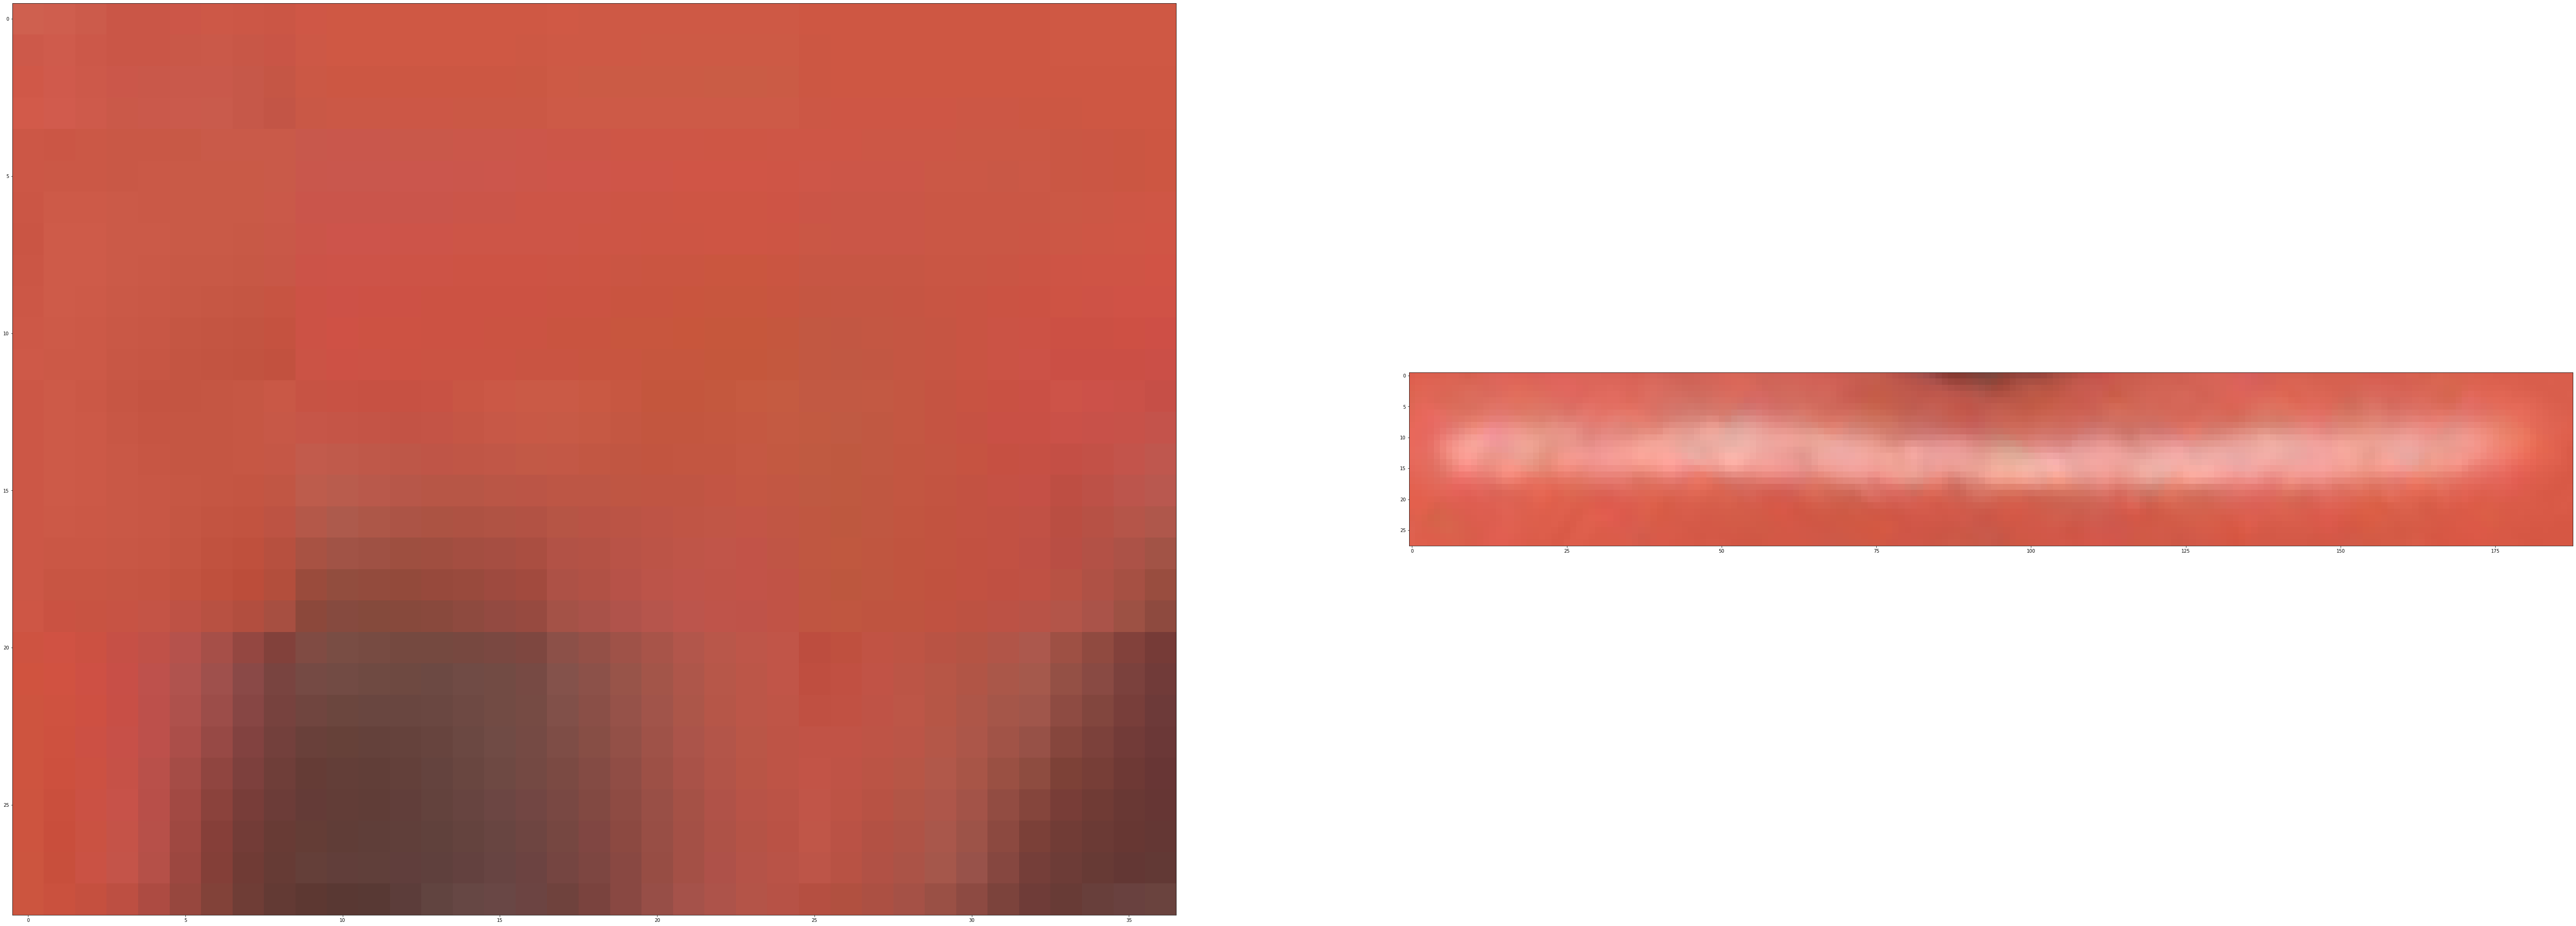

In [16]:
MinRectClosetContur = cv2.minAreaRect(closestContur)
MinRectSecondClosestContur =  cv2.minAreaRect(contoursWithoutDice[secondClosestCordIndex])
if debug == 1:
    print(MinRectClosetContur)
    print(MinRectSecondClosestContur)
angleDifreance = MinRectClosetContur[2]-MinRectSecondClosestContur[2]
if debug == 1:
    print(angleDifreance)
output = []
output.append(getSubImage(MinRectClosetContur,dieRaw))
if angleDifreance < 5 and angleDifreance > -5:
    output.append(getSubImage(MinRectSecondClosestContur,dieRaw))
output.append(getSubImage(MinRectSecondClosestContur,dieRaw))

if debug == 1:
    plt.figure(figsize=(100,100))
    plt.subplot(1,2,1),plt.imshow(output[0])
    plt.subplot(1,2,2),plt.imshow(output[1])